In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
%matplotlib inline


In [3]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
gender_submission = pd.read_csv("gender_submission.csv")

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [8]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [26]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
gender_submission.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [9]:
train.groupby("Sex").count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


In [11]:
train.groupby("Sex")["Age"].median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [12]:
train.groupby("Survived").count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [13]:
train.groupby("Sex")["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [14]:
train["Age"].mean()

np.float64(29.69911764705882)

In [15]:
train["Age"].median()

28.0

In [16]:
test.groupby("Sex").count()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,
female,152,152,152,127,152,152,152,152,44,152
male,266,266,266,205,266,266,266,265,47,266


In [17]:
test.groupby("Sex")["Age"].mean()

Sex
female    30.272362
male      30.272732
Name: Age, dtype: float64

In [18]:
test.groupby("Pclass").count()

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,
1,107,107,107,98,107,107,107,107,80,107
2,93,93,93,88,93,93,93,93,7,93
3,218,218,218,146,218,218,218,217,4,218


In [20]:
test.groupby("Pclass")["Fare"].mean()

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

In [21]:
test.groupby("Pclass")["Fare"].median()

Pclass
1    60.0000
2    15.7500
3     7.8958
Name: Fare, dtype: float64

In [22]:
gender_submission.groupby("Survived").size()

Survived
0    266
1    152
dtype: int64

In [23]:
gender_submission["Survived"].mean()

np.float64(0.36363636363636365)

In [24]:
gender_submission["Survived"].median()

0.0

In [25]:
gender_submission["Survived"].mode()

0    0
Name: Survived, dtype: int64

In [35]:
freq_table = train.groupby(['Sex']).size().reset_index(name='Count')
freq_table

,Sex,Count
0,female,314
1,male,577


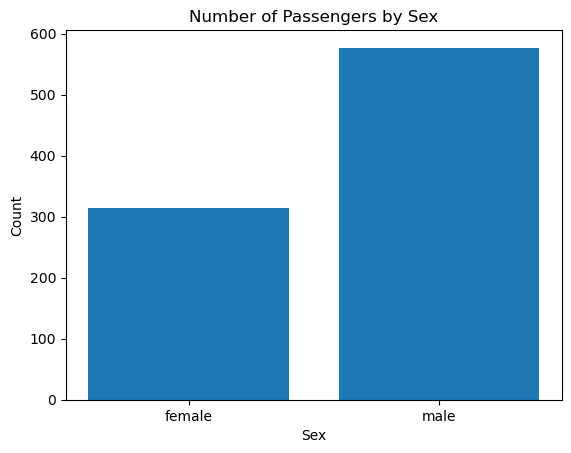

In [38]:
plt.bar(freq_table['Sex'], freq_table['Count'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Number of Passengers by Sex')
plt.show()

In [41]:
freq_table = train.groupby(['Pclass']).size().reset_index(name='Count')
freq_table

,Pclass,Count
0,1,216
1,2,184
2,3,491


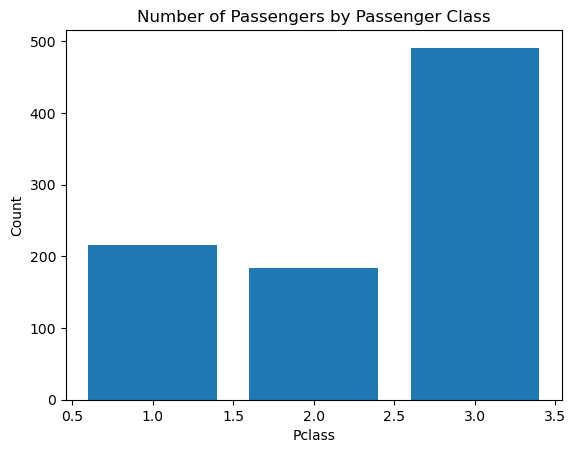

In [42]:
plt.bar(freq_table['Pclass'], freq_table['Count'])
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Number of Passengers by Passenger Class')
plt.show()

In [43]:
freq_table_test = test.groupby(['Pclass']).size().reset_index(name='Count')
freq_table_test

,Pclass,Count
0,1,107
1,2,93
2,3,218


In [45]:
freq_table_gender = gender_submission.groupby(['Survived']).size().reset_index(name='Count')
freq_table_gender

,Survived,Count
0,0,266
1,1,152


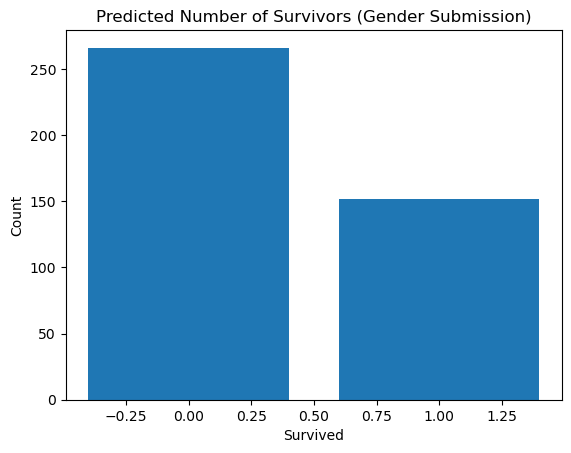

In [46]:
plt.bar(freq_table_gender['Survived'], freq_table_gender['Count'])
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Predicted Number of Survivors (Gender Submission)')
plt.show()

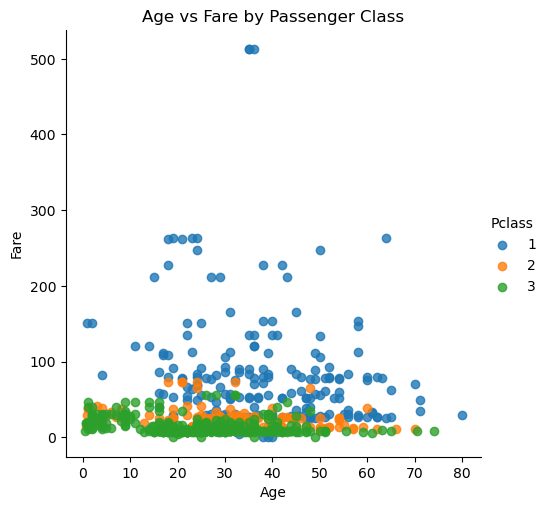

In [72]:
sns.lmplot(x='Age', y='Fare', hue='Pclass', fit_reg=False, data=train)
plt.title('Age vs Fare by Passenger Class')
plt.show()

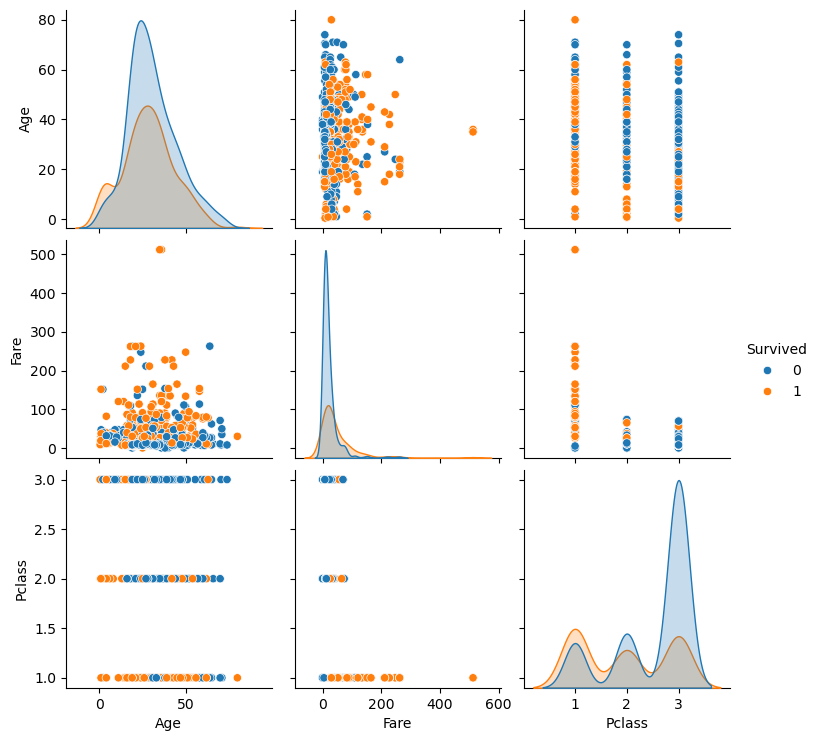

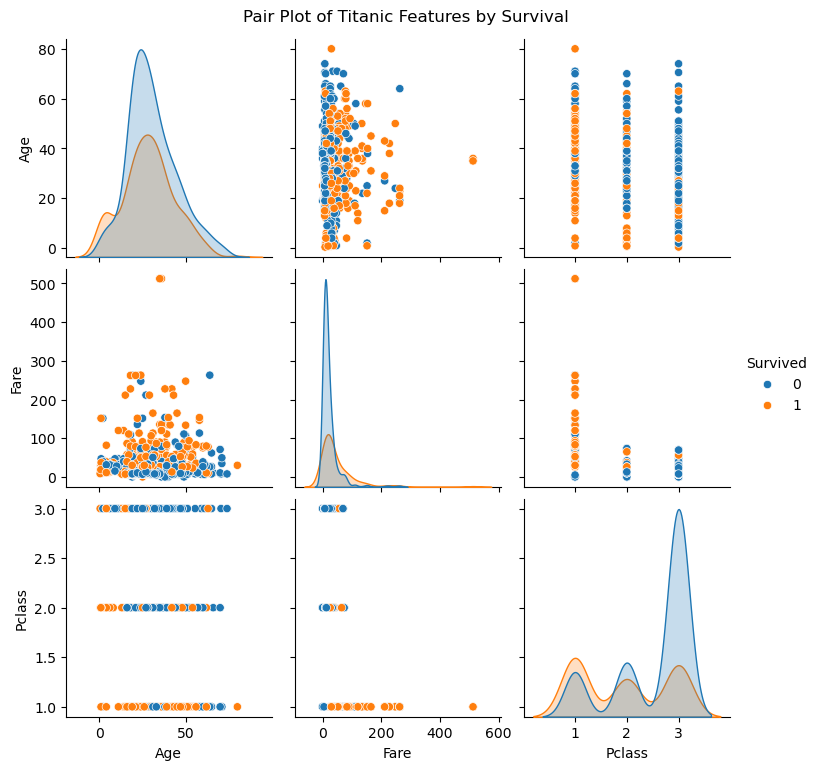

In [75]:
sns.pairplot(data=train, vars=['Age', 'Fare', 'Pclass'], hue='Survived')
plt.suptitle('Pair Plot of Titanic Features by Survival', y=1.02)
plt.show()